<a href="https://colab.research.google.com/github/Mr-RAKSHIT-2004-GUPTA/Rigression/blob/main/LR_roc%26auc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

X,y = make_classification(n_samples = 1000 , n_features =10 , n_redundant = 5 ,n_informative = 5,n_classes = 2 ,random_state = 1 )

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [6]:
model=  LogisticRegression()

In [7]:
model.fit(X_train,y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.825
[[84 10]
 [25 81]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        94
           1       0.89      0.76      0.82       106

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200



In [14]:
from sklearn.metrics import roc_curve ,auc
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[: , 1]

In [15]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

In [16]:
fpr

array([0.        , 0.        , 0.        , 0.0106383 , 0.0106383 ,
       0.03191489, 0.03191489, 0.05319149, 0.05319149, 0.07446809,
       0.07446809, 0.08510638, 0.08510638, 0.09574468, 0.09574468,
       0.10638298, 0.10638298, 0.11702128, 0.11702128, 0.12765957,
       0.12765957, 0.13829787, 0.13829787, 0.14893617, 0.14893617,
       0.15957447, 0.15957447, 0.26595745, 0.26595745, 0.32978723,
       0.32978723, 0.36170213, 0.36170213, 0.45744681, 0.45744681,
       0.53191489, 0.53191489, 0.64893617, 0.64893617, 0.69148936,
       0.69148936, 0.81914894, 0.81914894, 0.85106383, 0.85106383,
       0.92553191, 0.92553191, 0.94680851, 0.94680851, 0.95744681,
       0.95744681, 0.9893617 , 0.9893617 , 1.        ])

In [17]:
tpr

array([0.        , 0.00943396, 0.58490566, 0.58490566, 0.63207547,
       0.63207547, 0.66037736, 0.66037736, 0.66981132, 0.66981132,
       0.70754717, 0.70754717, 0.72641509, 0.72641509, 0.74528302,
       0.74528302, 0.76415094, 0.76415094, 0.78301887, 0.78301887,
       0.79245283, 0.79245283, 0.80188679, 0.80188679, 0.82075472,
       0.82075472, 0.83962264, 0.83962264, 0.8490566 , 0.8490566 ,
       0.86792453, 0.86792453, 0.87735849, 0.87735849, 0.88679245,
       0.88679245, 0.90566038, 0.90566038, 0.91509434, 0.91509434,
       0.9245283 , 0.9245283 , 0.93396226, 0.93396226, 0.95283019,
       0.95283019, 0.96226415, 0.96226415, 0.98113208, 0.98113208,
       0.99056604, 0.99056604, 1.        , 1.        ])

In [18]:
thresholds

array([       inf, 0.99860834, 0.77853237, 0.73355127, 0.70086839,
       0.67252701, 0.65516811, 0.64952045, 0.64869587, 0.6218605 ,
       0.59797029, 0.59781117, 0.58053798, 0.5636631 , 0.54985743,
       0.54808534, 0.52888462, 0.49687015, 0.48708028, 0.48271716,
       0.46962865, 0.46233792, 0.46154273, 0.45459622, 0.43225425,
       0.43002213, 0.42392874, 0.35421862, 0.33430058, 0.31186913,
       0.3068611 , 0.29538292, 0.29408197, 0.26110254, 0.26074152,
       0.22531307, 0.20497171, 0.17119768, 0.16962645, 0.15733928,
       0.1548675 , 0.11638954, 0.11610241, 0.09950113, 0.09572539,
       0.07451593, 0.06992356, 0.05049051, 0.04786668, 0.04244733,
       0.04210657, 0.02077529, 0.01975881, 0.01860321])

In [23]:
roc_auc = auc(fpr,tpr)

In [24]:
roc_auc

0.8714371738257727

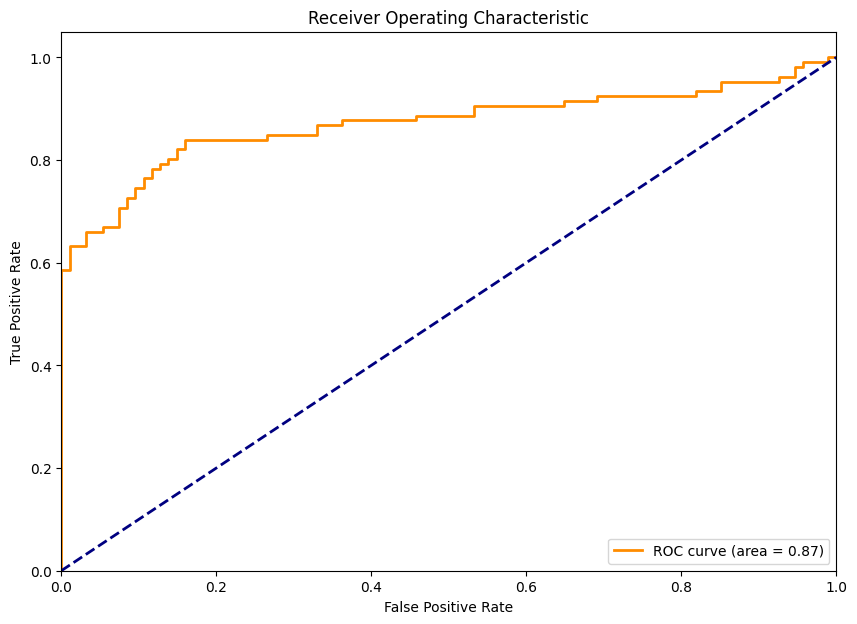

In [25]:
plt.figure(figsize = (10,7))
plt.plot(fpr,tpr,color = 'darkorange',lw = 2,label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color = 'navy',lw = 2,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')

In [ ]:
#precision recall accuracy tradeoff to decide optimal thershold
#by default sklearn 0.5 uses as threshold

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


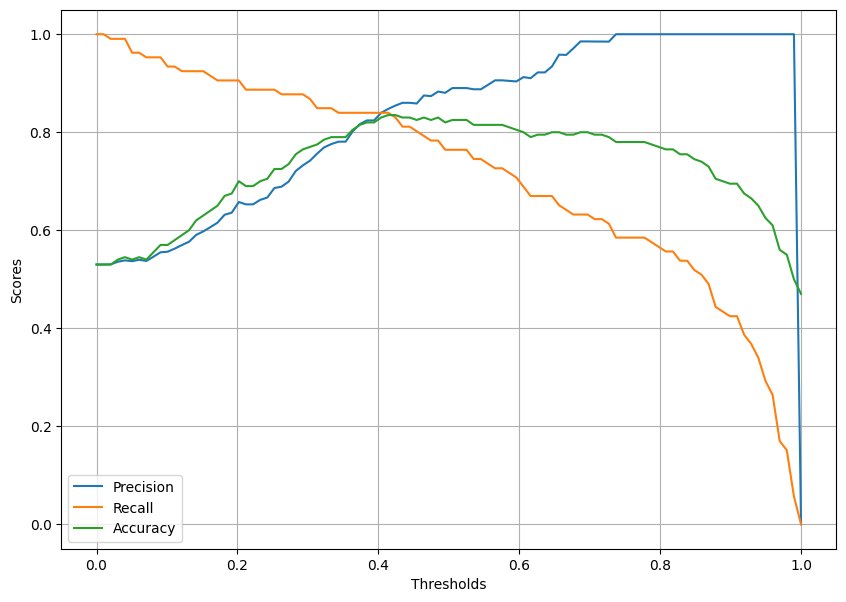

In [30]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

thresholds = np.linspace(0,1,100)
precisions = []
recalls = []
accuracies = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precision = precision_score(y_test,y_pred_threshold)
    recall = recall_score(y_test,y_pred_threshold)
    accuracy = accuracy_score(y_test,y_pred_threshold)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
plt.figure(figsize = (10,7))
plt.plot(thresholds,precisions,label = 'Precision')
plt.plot(thresholds,recalls,label = 'Recall')
plt.plot(thresholds,accuracies,label = 'Accuracy')
plt.xlabel('Thresholds')
plt.ylabel('Scores')
plt.grid()
plt.legend()

In [31]:
#observation >> cutoff 0.4

In [33]:
new_pred_labels = np.where(y_pred_proba >= 0.4 , 1,0)

In [34]:
#cross validation
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,X_train,y_train,cv = cv,scoring = 'accuracy')



In [36]:
scores

array([0.84375, 0.775  , 0.8    , 0.8125 , 0.78125])